In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# 시간 측정을 위한 시간 모듈
import datetime

# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# Pandas Data Reader를 통해서 Yahoo Finace의 데이터를 가져오기
df = pdr.DataReader('주식 종목코드', 'yahoo',시작날,종료날)
- 데이터 프레임 형태로 불러올 수


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yfin
from pandas_datareader import data

yfin.pdr_override()

#카카오 주식
slb = data.get_data_yahoo('035720.KS', start = '2010-01-01', end = '2022-06-30')

[*********************100%***********************]  1 of 1 completed


### 저장한 정보를 읽어온다.

In [4]:
slb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,14163.392578,14949.128906,13921.627930,14787.952148,13954.350586,789077
2010-01-05,14707.363281,15170.746094,14546.187500,14908.834961,14068.419922,616248
2010-01-06,15029.716797,15150.599609,14707.363281,14969.275391,14125.454102,359620
2010-01-07,14969.275391,15070.010742,14526.040039,14787.952148,13954.350586,492582
2010-01-08,14808.099609,14808.099609,14123.098633,14687.216797,13859.294922,568588
...,...,...,...,...,...,...
2022-06-24,67400.000000,71500.000000,67400.000000,71500.000000,71500.000000,2331632
2022-06-27,72400.000000,72900.000000,70600.000000,71800.000000,71800.000000,1470633
2022-06-28,71600.000000,72300.000000,70600.000000,71600.000000,71600.000000,1082711


In [5]:
#인덱스의 데이터 타입을 확인 한다.
#dtype을 확인한다.
slb.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-06-17', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', length=3080, freq=None)

In [ ]:
# 인덱스가 다른 타입일 경우 날짜 타입으로 변경한다.
slb.index = pd.to_datetime(slb.index, format='%Y-%m-%d')
slb.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-06-17', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', length=3080, freq=None)

In [6]:
# 컬럼들의 데이터 타입을 확인한다.
slb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3080 entries, 2010-01-04 to 2022-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3080 non-null   float64
 1   High       3080 non-null   float64
 2   Low        3080 non-null   float64
 3   Close      3080 non-null   float64
 4   Adj Close  3080 non-null   float64
 5   Volume     3080 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 168.4 KB


In [7]:
#결측치 확인
slb.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 일별 수익률 계산

#### 이전 데이터와 값의 차이

cel['Close'] : 종가

In [8]:
slb['Close'].diff()

Date
2010-01-04            NaN
2010-01-05     120.882812
2010-01-06      60.440430
2010-01-07    -181.323242
2010-01-08    -100.735352
                 ...     
2022-06-24    4400.000000
2022-06-27     300.000000
2022-06-28    -200.000000
2022-06-29    -800.000000
2022-06-30    -900.000000
Name: Close, Length: 3080, dtype: float64

In [9]:
14908.834961 - 14787.952148

120.88281300000017

In [10]:
slb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,14163.392578,14949.128906,13921.627930,14787.952148,13954.350586,789077
2010-01-05,14707.363281,15170.746094,14546.187500,14908.834961,14068.419922,616248
2010-01-06,15029.716797,15150.599609,14707.363281,14969.275391,14125.454102,359620
2010-01-07,14969.275391,15070.010742,14526.040039,14787.952148,13954.350586,492582
2010-01-08,14808.099609,14808.099609,14123.098633,14687.216797,13859.294922,568588


#### 이전 보다 몇 퍼센트 정도 등락(-1 ~ 0 ~ 1)

In [11]:
slb_daily= slb['Close'].pct_change()
slb_daily

Date
2010-01-04         NaN
2010-01-05    0.008174
2010-01-06    0.004054
2010-01-07   -0.012113
2010-01-08   -0.006812
                ...   
2022-06-24    0.065574
2022-06-27    0.004196
2022-06-28   -0.002786
2022-06-29   -0.011173
2022-06-30   -0.012712
Name: Close, Length: 3080, dtype: float64

In [12]:
# 수익률이 0 미만인 데이터의 수를 구한다.
# 주가가 떨어진것
a1 = slb_daily < 0
a1

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07     True
2010-01-08     True
              ...  
2022-06-24    False
2022-06-27    False
2022-06-28     True
2022-06-29     True
2022-06-30     True
Name: Close, Length: 3080, dtype: bool

In [13]:
a1.sum()

1455

- 12년간 주식이 내린 날은 1455일


### 종가에 대한 10%, 90% 위치를 살펴본다.


In [14]:
#종가만 추출한다.
slb_close=slb['Close']
slb_close

Date
2010-01-04    14787.952148
2010-01-05    14908.834961
2010-01-06    14969.275391
2010-01-07    14787.952148
2010-01-08    14687.216797
                  ...     
2022-06-24    71500.000000
2022-06-27    71800.000000
2022-06-28    71600.000000
2022-06-29    70800.000000
2022-06-30    69900.000000
Name: Close, Length: 3080, dtype: float64

In [15]:
# 종가 금액의 요약 통계 정보를 살펴본다.
slb_des = slb_close.describe(percentiles=(0.1,0.9))
slb_des

count      3080.000000
mean      35118.966401
std       31668.369763
min       13196.333008
10%       15976.628906
50%       22967.664062
90%       88949.328125
max      170746.453125
Name: Close, dtype: float64

### 데이터 시각화

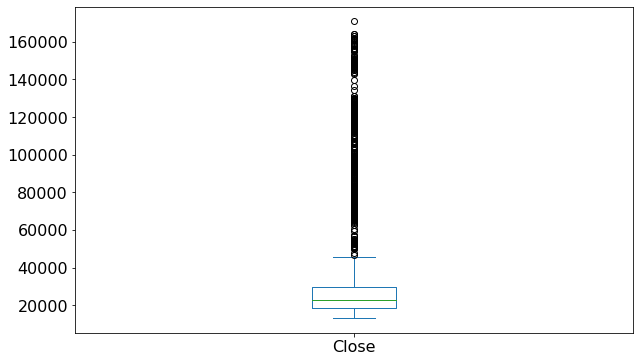

In [16]:
# 극단치 확인
plt.figure(figsize = (10,6))
slb_close.plot.box()
plt.show()

#### 종가 금액에 대한 그래프 색을 검정색으로 해서 그린다.
- x 축은 일자, y 축은 금액으로 처리한다.
- 데이터 프레임이나 시리즈의 인덱스가 x 축이 된다.


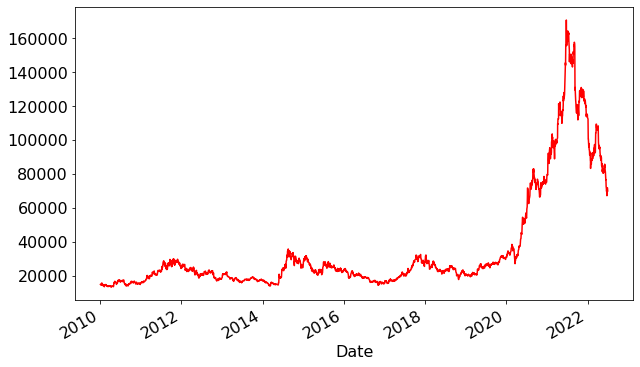

In [18]:
plt.figure(figsize = (10,6))
slb_close.plot(color='Red')
plt.show()

#### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 하나의 별도 그래프를 그려서 별도의 모양과 색으로 처리한다.


In [19]:
# 요약통계 정보를 가져온다.
slb_des = slb_close.describe(percentiles=[0.1, 0.9])
slb_des


count      3080.000000
mean      35118.966401
std       31668.369763
min       13196.333008
10%       15976.628906
50%       22967.664062
90%       88949.328125
max      170746.453125
Name: Close, dtype: float64

### 10%, 90%를 이용하한 시각화

- 10% 이하의 값들 요약통계 정보에서 10% 위치 값을 가져온다.

- 10%이하의 값들에 해당하는 것은 True로 되어있는 결과를 가져온다.

In [20]:
a1=slb_des.loc['10%']
a1

a2=slb_close <= a1 # 10%이하의 값들에 해당하는 것은 True로 되어있는 결과를 가져온다.
a2 

Date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2022-06-24    False
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Name: Close, Length: 3080, dtype: bool

- 90% 이상의 값들을 요약통계 정보에서 90% 위치 값을 가져온다.

- 90%이상의 값들에 해당하는 것은 True로 되어있는 결과를 가져온다.

In [21]:
a3=slb_des.loc['90%']
a3

a4=slb_close >= a3 # 90%이상의 값들에 해당하는 것은 True로 되어있는 결과를 가져온
a4

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2022-06-24    False
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Name: Close, Length: 3080, dtype: bool

- 위의 두 결과를 합친다. (or 연산을 한다.)
- or : |, 둘 중 하나라도 True면 결과를 True가 된다.
- and : &, 둘 중 하나라도 False면 결과를 False가 된다.

In [22]:
a5 = a2 | a4
a5.value_counts()


False    2461
True      619
Name: Close, dtype: int64

In [23]:
# 10%이하, 90%이상인 것들을 가져온다

slb_top_bottom=slb_close[a5]
slb_top_bottom

Date
2010-01-04    14787.952148
2010-01-05    14908.834961
2010-01-06    14969.275391
2010-01-07    14787.952148
2010-01-08    14687.216797
                  ...     
2022-04-27    89050.062500
2022-04-28    89956.687500
2022-04-29    90561.093750
2022-05-03    89150.804688
2022-05-04    89654.476562
Name: Close, Length: 619, dtype: float64

# 시각화
- style : 선의 모양. ' ' 를 주면 선의 모양은 빈칸이 된다.
- marker : 값 위치에 표시할 모양, o는 점
- ms : 마커의 크기
- color : 색상

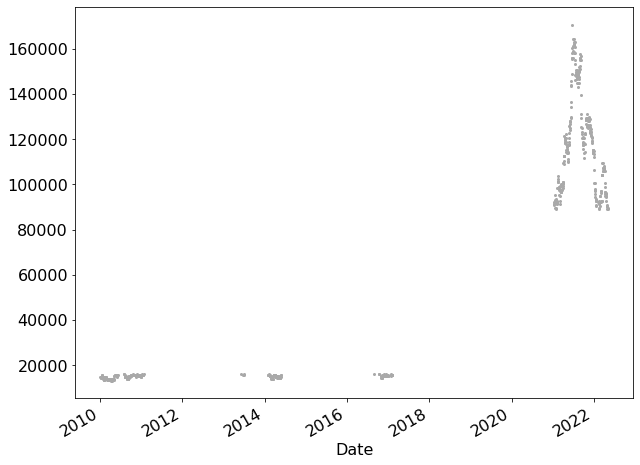

In [ ]:
slb_top_bottom.plot(style=' ', marker='o', ms=2, color='darkgray')
plt.show()


## 그래프 내에 강조 선 그리기
- 상위(90%), 하위(10%) 선을 그린다.


In [ ]:
# 10% 이하의 값들
a1 = slb_close <= slb_des.loc['10%']
# 90% 이상의 값들
a2 = slb_close >= slb_des.loc['90%']

criteria = a1 | a2
criteria


Date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2022-06-24    False
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Name: Close, Length: 3080, dtype: bool

- 선을 그리기 위해 y 축을 10%, 90%의 위치로 지정하고 x 축은 시작점과
- 종료점으로 셋팅한다.

In [ ]:
# 10% 위치값
value_10 = slb_des.loc['10%']
# 90% 위치값
value_90 = slb_des.loc['90%']

# 제일 작은 날짜값
index_min = criteria.index[0]
# 제일 큰 날짜값
index_max = criteria.index[-1]
print(f"value_10: {value_10}")
print(f"value_90: {value_90}")
print(f"index_min: {index_min}")
print(f"index_max: {index_max}")

value_10: 15976.62890625
value_90: 88949.328125
index_min: 2010-01-04 00:00:00
index_max: 2022-06-30 00:00:00


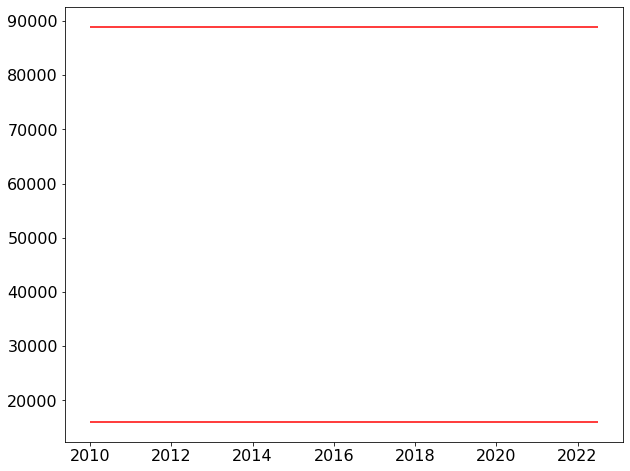

In [ ]:
plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, 
          color='red')
plt.show()

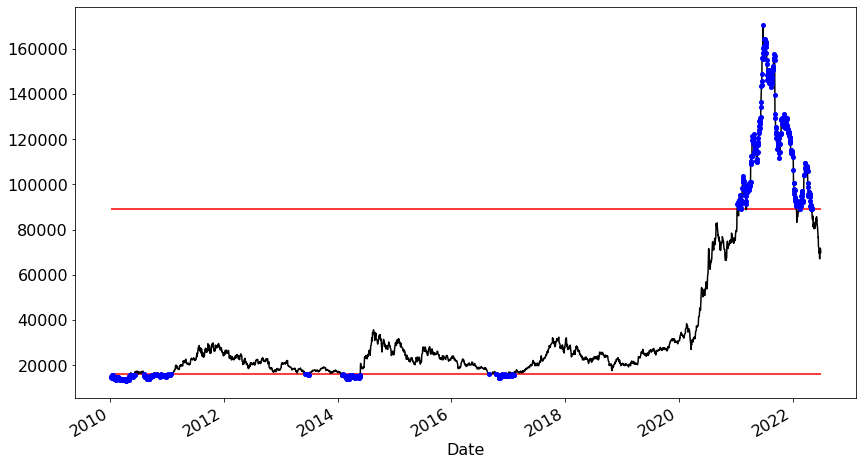

In [ ]:
#지금까지 살펴본 3가지 그래프를 한번에 그린다.

plt.figure(figsize = (14,8))
# 종가 전체 그래프
slb_close.plot(color='black')

# 상위 90% 이상, 하위 10% 이하에 점을 찍는다.
slb_top_bottom.plot(style=' ', marker='o', ms=4, color='blue')

# 상위 90% 위치, 하위 10% 위치에 강조선을 긋는다.
plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, 
          color='red')
plt.show()

#### pct_change : 현재 원소와 이전 원소간의 % 변화율 계산

In [ ]:
slb_pct_change = slb['Close'].pct_change()
slb_pct_change

Date
2010-01-04         NaN
2010-01-05    0.008174
2010-01-06    0.004054
2010-01-07   -0.012113
2010-01-08   -0.006812
                ...   
2022-06-24    0.065574
2022-06-27    0.004196
2022-06-28   -0.002786
2022-06-29   -0.011173
2022-06-30   -0.012712
Name: Close, Length: 3080, dtype: float64

In [ ]:
# 첫 번째 날은 이전 날이 없기 때문에 결과가 결측치로 되어 있다.
slb_pct_change.isna().sum()

1

In [ ]:
# 제거한다.
slb_pct_change.dropna(inplace=True)
slb_pct_change.isna().sum()

0

#### 0을 기준으로 양수: 오른날 음수: 내린날
- 내린날 보다 오른날이 더 많은것을 알 수 있다. 

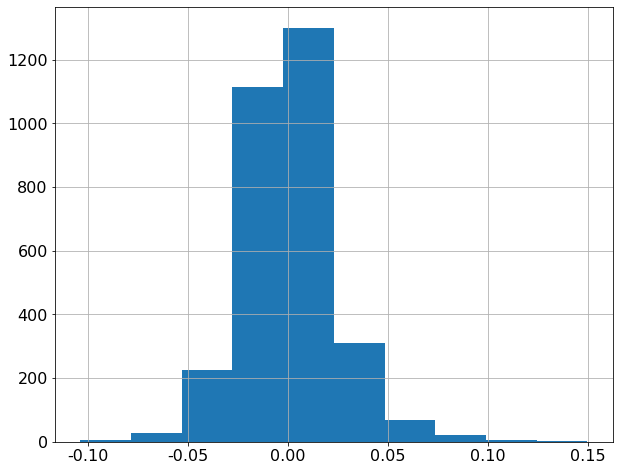

In [ ]:
slb_pct_change.hist()
plt.show()

#Meta(facebook) Prophet

- https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
slb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,14163.392578,14949.128906,13921.627930,14787.952148,13954.350586,789077
2010-01-05,14707.363281,15170.746094,14546.187500,14908.834961,14068.420898,616248
2010-01-06,15029.716797,15150.599609,14707.363281,14969.275391,14125.452148,359620
2010-01-07,14969.275391,15070.010742,14526.040039,14787.952148,13954.350586,492582
2010-01-08,14808.099609,14808.099609,14123.098633,14687.216797,13859.293945,568588
...,...,...,...,...,...,...
2022-06-24,67400.000000,71500.000000,67400.000000,71500.000000,71500.000000,2331632
2022-06-27,72400.000000,72900.000000,70600.000000,71800.000000,71800.000000,1470633
2022-06-28,71600.000000,72300.000000,70600.000000,71600.000000,71600.000000,1082711


In [ ]:
# 시간 데이터는 ds 분석 데이터는 y로 반드시 바꿔줘야 모델이 학습할 수 있다.

slb['y'] = slb['Close']
slb['ds'] = slb.index

In [ ]:
prophet = Prophet() # Default growth='linear'
prophet.fit(slb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22f309vm/taw7fc5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22f309vm/f0od719k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11193', 'data', 'file=/tmp/tmp22f309vm/taw7fc5_.json', 'init=/tmp/tmp22f309vm/f0od719k.json', 'output', 'file=/tmp/tmp61qrk9e_/prophet_model-20220912113151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet.make_future_dataframe(periods = 200)
future[:10]

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
5,2010-01-11
6,2010-01-12
7,2010-01-13
8,2010-01-14
9,2010-01-15


In [ ]:
forecast = prophet.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,14416.857247,-2755.965616,28186.732737,14416.857247,14416.857247,-1714.918420,-1714.918420,-1714.918420,-180.455961,-180.455961,-180.455961,-1534.462459,-1534.462459,-1534.462459,0.0,0.0,0.0,12701.938827
1,2010-01-05,14429.828174,-2356.020149,28504.015815,14429.828174,14429.828174,-1535.469662,-1535.469662,-1535.469662,-43.360760,-43.360760,-43.360760,-1492.108902,-1492.108902,-1492.108902,0.0,0.0,0.0,12894.358512
2,2010-01-06,14442.799100,-1460.389587,27632.795394,14442.799100,14442.799100,-1424.731948,-1424.731948,-1424.731948,29.834723,29.834723,29.834723,-1454.566670,-1454.566670,-1454.566670,0.0,0.0,0.0,13018.067153
3,2010-01-07,14455.770027,-1835.337419,27763.107625,14455.770027,14455.770027,-1485.066493,-1485.066493,-1485.066493,-62.170098,-62.170098,-62.170098,-1422.896394,-1422.896394,-1422.896394,0.0,0.0,0.0,12970.703534
4,2010-01-08,14468.740953,-1559.150123,28696.563585,14468.740953,14468.740953,-1463.699787,-1463.699787,-1463.699787,-65.735346,-65.735346,-65.735346,-1397.964441,-1397.964441,-1397.964441,0.0,0.0,0.0,13005.041166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,2023-01-12,152765.228603,134796.637548,166787.362635,151558.269780,153954.943851,-1435.476701,-1435.476701,-1435.476701,-62.170098,-62.170098,-62.170098,-1373.306603,-1373.306603,-1373.306603,0.0,0.0,0.0,151329.751902
3276,2023-01-13,152863.569946,136317.238853,166748.462219,151648.447024,154063.138779,-1451.589401,-1451.589401,-1451.589401,-65.735346,-65.735346,-65.735346,-1385.854055,-1385.854055,-1385.854055,0.0,0.0,0.0,151411.980545
3277,2023-01-14,152961.911290,135478.468111,166347.545788,151738.769408,154171.333707,-1245.206867,-1245.206867,-1245.206867,160.943724,160.943724,160.943724,-1406.150591,-1406.150591,-1406.150591,0.0,0.0,0.0,151716.704423
3278,2023-01-15,153060.252634,136340.225318,167598.538609,151829.091791,154276.953680,-1272.809760,-1272.809760,-1272.809760,160.943718,160.943718,160.943718,-1433.753479,-1433.753479,-1433.753479,0.0,0.0,0.0,151787.442874


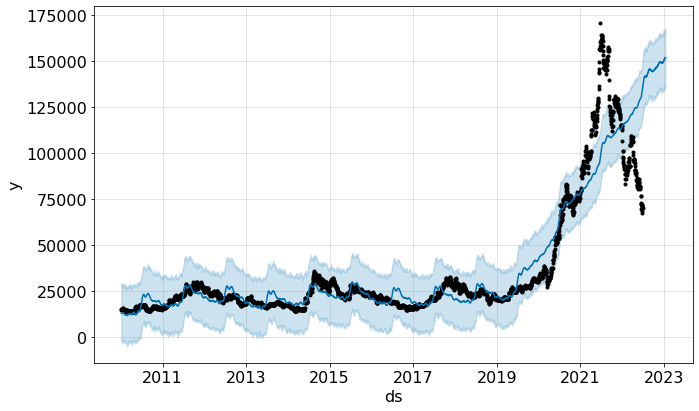

In [ ]:
prophet.plot(forecast)
plt.show()

In [ ]:
slb2 = slb[slb['ds'].between('2018-01-01', '2023-05-01')]

#slb = slb.set_index(['Date'])
filtered= slb.loc['2021-02-01':'2021-05-01']

In [ ]:
prophet = Prophet() # Default growth='linear'
prophet.fit(slb2)
future = prophet.make_future_dataframe(periods = 90)

forecast = prophet.predict(future)
forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22f309vm/39o9msyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp22f309vm/7c75y0l_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42561', 'data', 'file=/tmp/tmp22f309vm/39o9msyv.json', 'init=/tmp/tmp22f309vm/7c75y0l_.json', 'output', 'file=/tmp/tmppzg4urok/prophet_model-20220912113157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,33393.396077,23407.992389,37520.227009,33393.396077,33393.396077,-2718.419874,-2718.419874,-2718.419874,840.846577,840.846577,840.846577,-3559.266452,-3559.266452,-3559.266452,0.0,0.0,0.0,30674.976203
1,2018-01-03,33316.644922,23220.198796,37791.136072,33316.644922,33316.644922,-2686.090148,-2686.090148,-2686.090148,927.832837,927.832837,927.832837,-3613.922985,-3613.922985,-3613.922985,0.0,0.0,0.0,30630.554774
2,2018-01-04,33239.893766,23541.969629,37434.770595,33239.893766,33239.893766,-2928.113586,-2928.113586,-2928.113586,748.590015,748.590015,748.590015,-3676.703601,-3676.703601,-3676.703601,0.0,0.0,0.0,30311.780180
3,2018-01-05,33163.142611,23402.637171,37283.050193,33163.142611,33163.142611,-2899.507475,-2899.507475,-2899.507475,848.965623,848.965623,848.965623,-3748.473099,-3748.473099,-3748.473099,0.0,0.0,0.0,30263.635136
4,2018-01-08,32932.889145,23103.011029,36909.314493,32932.889145,32932.889145,-3285.427788,-3285.427788,-3285.427788,736.444991,736.444991,736.444991,-4021.872779,-4021.872779,-4021.872779,0.0,0.0,0.0,29647.461357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2022-09-24,57753.394123,46496.440520,62659.202778,54925.137131,60791.424812,-3260.670884,-3260.670884,-3260.670884,-2051.340485,-2051.340485,-2051.340485,-1209.330399,-1209.330399,-1209.330399,0.0,0.0,0.0,54492.723240
1191,2022-09-25,57549.925514,45621.176179,61433.331171,54744.204698,60647.017726,-3543.598502,-3543.598502,-3543.598502,-2051.339558,-2051.339558,-2051.339558,-1492.258944,-1492.258944,-1492.258944,0.0,0.0,0.0,54006.327012
1192,2022-09-26,57346.456905,48661.015653,64589.093493,54480.144922,60519.575800,-1001.902118,-1001.902118,-1001.902118,736.444991,736.444991,736.444991,-1738.347109,-1738.347109,-1738.347109,0.0,0.0,0.0,56344.554787
1193,2022-09-27,57142.988296,48090.429232,63820.288303,54216.085146,60365.924732,-1106.860364,-1106.860364,-1106.860364,840.846577,840.846577,840.846577,-1947.706941,-1947.706941,-1947.706941,0.0,0.0,0.0,56036.127932


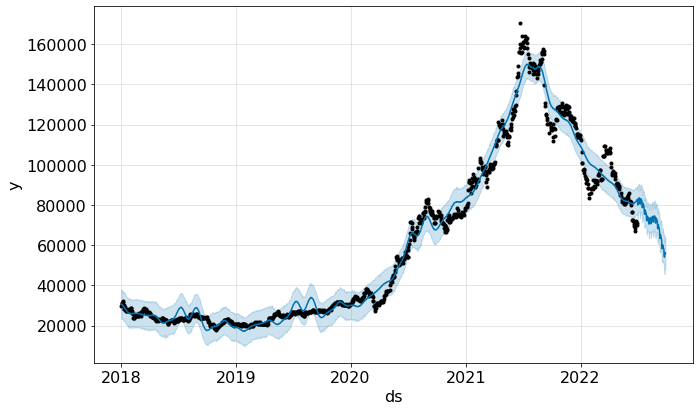

In [ ]:
prophet.plot(forecast)
plt.show()

#비트코인

In [ ]:
btc = data.get_data_yahoo('BTC-USD', start = '2016-01-01', end = '2022-06-30')

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...
2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497
2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161


In [ ]:
btc['y'] = btc['Close']
btc['ds'] = btc.index

In [ ]:
prophet = Prophet() # Default growth='linear'
prophet.fit(btc)
future = prophet.make_future_dataframe(periods = 90)

forecast = prophet.predict(future)
forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg48899af/s47kcj7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg48899af/7o9mnu74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39502', 'data', 'file=/tmp/tmpg48899af/s47kcj7r.json', 'init=/tmp/tmpg48899af/7o9mnu74.json', 'output', 'file=/tmp/tmp9c4xu7rt/prophet_model-20220910125818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:58:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,591.532716,-3221.386661,7262.411412,591.532716,591.532716,1558.686125,1558.686125,1558.686125,-3.047489,-3.047489,-3.047489,1561.733614,1561.733614,1561.733614,0.0,0.0,0.0,2150.218841
1,2016-01-02,591.477549,-2752.674960,7569.305782,591.477549,591.477549,1607.370284,1607.370284,1607.370284,15.961326,15.961326,15.961326,1591.408958,1591.408958,1591.408958,0.0,0.0,0.0,2198.847833
2,2016-01-03,591.422382,-3202.384658,7822.543254,591.422382,591.422382,1609.796400,1609.796400,1609.796400,5.612796,5.612796,5.612796,1604.183605,1604.183605,1604.183605,0.0,0.0,0.0,2201.218783
3,2016-01-04,591.367216,-3277.938126,7417.341573,591.367216,591.367216,1612.620767,1612.620767,1612.620767,13.977927,13.977927,13.977927,1598.642839,1598.642839,1598.642839,0.0,0.0,0.0,2203.987982
4,2016-01-05,591.312049,-3093.454321,7528.637768,591.312049,591.312049,1567.082026,1567.082026,1567.082026,-6.649578,-6.649578,-6.649578,1573.731605,1573.731605,1573.731605,0.0,0.0,0.0,2158.394075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2022-09-24,34408.374548,28885.643967,39800.331412,32772.602571,35728.412168,-160.824922,-160.824922,-160.824922,15.961326,15.961326,15.961326,-176.786248,-176.786248,-176.786248,0.0,0.0,0.0,34247.549626
2459,2022-09-25,34378.762384,28433.875371,40168.057454,32709.274588,35741.849142,-146.986476,-146.986476,-146.986476,5.612796,5.612796,5.612796,-152.599272,-152.599272,-152.599272,0.0,0.0,0.0,34231.775908
2460,2022-09-26,34349.150219,28239.196434,39939.529690,32634.702192,35730.434839,-104.938879,-104.938879,-104.938879,13.977927,13.977927,13.977927,-118.916807,-118.916807,-118.916807,0.0,0.0,0.0,34244.211340
2461,2022-09-27,34319.538055,28497.633034,40211.163609,32568.655254,35723.722625,-82.149434,-82.149434,-82.149434,-6.649578,-6.649578,-6.649578,-75.499855,-75.499855,-75.499855,0.0,0.0,0.0,34237.388621


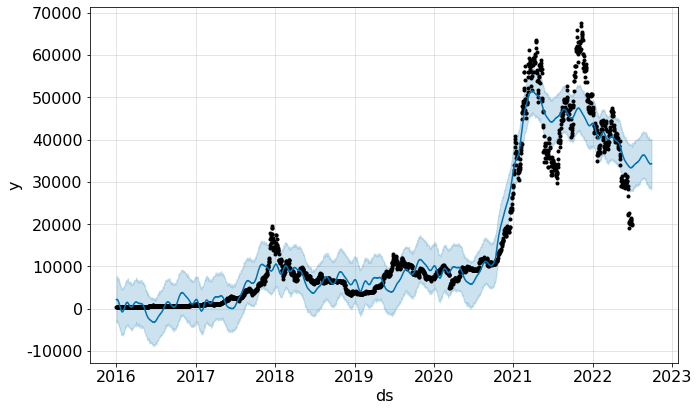

In [ ]:
prophet.plot(forecast)
plt.show()